# 5 线性神经网络——线性回归

## 5.1 线性回归

### 5.1.1 线性回归的基本元素

**（1）线性模型：特征与权重的点积加上偏置**
$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，我们可以用点积形式来简洁地表达模型：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

**线性模型可以看作是单层神经网络（输入层x，每个箭头代表一个权重，一个输出层y）。**

**（2）损失函数：衡量我们设计的模型的质量**
$$\ell(y, \hat{y}) = \frac{1}{2} \left(y - \hat{y}\right)^2.$$
平方损失。前面的$\frac{1}{2}$是因为求导的时候可以方便地消去。 

**（3）训练数据：收集一些数据点来决定参数值（权重和偏差），通常越多越好**

假设我们有n个样本，记：
$$\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_n]^T\qquad \mathbf{Y} = [\mathbf{y}_1, \mathbf{y}_2, \cdots, \mathbf{y}_n]^T$$
训练损失：
$$\ell(\mathbf{X}, \mathbf{y}, \mathbf{w}, b)=\frac{1}{2 n} \sum_{i=1}^{n}\left(y_{i}-\left\langle\mathbf{x}_{i}, \mathbf{w}\right\rangle-b\right)^{2}=\frac{1}{2 n}\|\mathbf{y}-\mathbf{X} \mathbf{w}-b\|^{2}$$
训练损失就是真实值与预测值之差的平均值。 

### 5.1.2 解析解
当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。

最小化损失来学习参数：
$$\mathbf{w}^{*}, \mathbf{b}^{*}=\underset{\mathbf{w}, b}{\arg \min } \ell(\mathbf{X}, \mathbf{y}, \mathbf{w}, b)$$

目标是找到一个合适的$\mathbf{w}$、$b$，使得损失函数最小。
arg min是指让后面公式取得最小值的参数大小。
最终得到最优解为：
$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}y$$

- 线性回归是对n维输入的加权，外加偏差
- 使用平方损失来衡量预测值和真实值的差异
- 线性回归有显示解（这堂课中唯一一个有显示解的模型）
- 线性回归可以看做是单层神经网络

### 5.1.3 数值解
然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

**梯度下降：**

- 挑选一个初始值 $\mathbf{w}_{0}$
- 重复迭代参数 $\mathrm{t}=1,2,3$
$$
\mathbf{w}_{t}=\mathbf{w}_{t-1}-\eta \frac{\partial \ell}{\partial \mathbf{w}_{t-1}}
$$
- 沿梯度方向将增加损失函数值
- 学习率$\eta$：步长的超参数（人为设定的，并不是通过模型训练学出的）


**小批量随机梯度下降：**

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，**使每次迭代都可能降低损失函数的值。**

在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch），然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

- 在整个训练集上算梯度太贵
- 一个深度神经网络模型可能需要数分钟至数小时
- 我们可以随机采样 b 个样本 $i_{1}, i_{2}, \ldots, i_{b}$ 来近似损失
$$
\frac{1}{b} \sum_{i \in I_{b}} \ell{\left(\mathbf{x}_{i}\right.}, y_{i}, \mathbf{w})
$$
- $\mathrm{b}$ 是批量大小, 另一个重要的超参数

**总结：**

- 梯度下降通过不断沿着反梯度方向更新参数求解
- 小批量随机梯度下降是深度学习默认的求解算法
- 两个重要的超参数是批量大小和学习率

## 5.2 线性回归的从零开始实现

只使用Tensor的计算来实现算法细节

### 5.2.1 生成数据集

In [86]:
%matplotlib inline  
#在plot时，默认嵌入到notebook里面
import random
import torch
from d2l import torch as d2l

首先简单构造一个训练数据集。样本数为1000，输入个数（特征数）为2，线性回归模型真实权重 $\boldsymbol{w}=[2,-3.4]^{\top}$ 和偏差 $b=4.2 $， 以及一个随机噪声项 $\epsilon$ 来生成标签
$$
\boldsymbol{y}=\boldsymbol{X} \boldsymbol{w}+b+\epsilon
$$
其中噪声项 $\epsilon$ 服从均值为 0 、标准差为 $0.01$ 的正态分布。噪声代表了数据集中无意义的干扰。

下面，让我们生成数据集。

In [87]:
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))  #X是均值为0，方差为1的随机数。有num_examples个样本，列就是len(w)
    y = torch.matmul(X, w) + b  #Y是X与w的乘积（matmul == mm，矩阵相乘）加上偏差b
    y += torch.normal(0, 0.01, y.shape)  #加入一个噪音，均值为0，方差为0.01，形状与y相同
    return X, y.reshape((-1, 1))  #其中，y返回一个列向量。-1表示自动计算，1表示固定，即列向量为1

#定义真实的w、b，通过synthetic_data(w, b, num_examples)函数来生成特征（1000×2）和标注（1000×1）
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)  

In [88]:
features[0], labels[0]  #第0个样本和第0个标注

(tensor([0.5727, 0.7235]), tensor([2.8595]))

可以通过生成第二个特征features[:, 1]和标签 labels 的散点图，更直观地观察两者间的线性关系。

前面[PyTorch绘制函数图像及切线](https://blog.csdn.net/niexinyu0026/article/details/121334663)已经用过d2l了，这里直接用d2l导入。

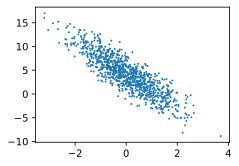

In [89]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

### 5.2.2 读取数据

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数data_iter()：它每次返回batch_size（均匀采样得来的批量大小）个随机样本的特征和标签。

In [90]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)  #前面已经有结果了：len(features)=1000
    indices = list(range(num_examples))  #生成0到n-1
    random.shuffle(indices)  #把下标随机打乱，这样就可以随机顺序访问每个样本
     
    for i in range(0, num_examples, batch_size):  #从0到n-1，每隔batch_size取样
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])  
            #min(i + batch.size, num_examples) 表示，当取最后一个值时，可能不够batch.size这么多，此时取剩下的里面的最小值
        yield features[batch_indices], labels[batch_indices]  
            #yield就是类似return返回一个值，但同时还返回了值的位置，下次迭代就从这个位置后开始

读取第一个小批量数据样本并打印。每个批量的特征形状为(10, 2)，分别对应批量大小和输入个数；标签形状为批量大小。

In [91]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break  #这里跳出了，也就是只取第一个X，y

tensor([[ 0.8751, -1.0661],
        [ 0.2158,  1.8511],
        [ 0.2481, -0.1048],
        [-0.0134, -0.2496],
        [-0.9259, -1.4344],
        [-1.0115,  1.0190],
        [ 0.7449, -0.6315],
        [-0.5641, -0.5824],
        [-0.4066,  0.7191],
        [ 0.0939, -1.6489]]) 
 tensor([[ 9.5777],
        [-1.6444],
        [ 5.0746],
        [ 5.0114],
        [ 7.2432],
        [-1.2826],
        [ 7.8338],
        [ 5.0504],
        [ 0.9423],
        [ 9.9776]])


### 5.2.3 建立模型
（1）首先**初始化模型参数**

In [92]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[0.0140],
         [0.0094]], requires_grad=True),
 tensor([0.], requires_grad=True))

（2）接着，我们就需要**更新这些参数**，直到这些参数足够拟合我们的数据

每次更新都需要计算损失函数关于模型参数的梯度。有了这个梯度，我们就可以向减小损失的方向更新每个参数。因此，还要**定义损失函数**

In [93]:
def squared_loss(y_hat, y):  #@save
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2  #将真实值y的形状转换为和预测值y_hat的形状相同

（3）接下来，**定义模型**，将模型的输入和参数同模型的输出关联起来

In [94]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return torch.matmul(X, w) + b  #向量+标量，广播机制

（4）然后**定义优化算法**，实现小批量随机梯度下降更新

使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。接下来，朝着减少损失的方向更新我们的参数。 下面的函数中：

- params是参数集合，包括了w，b。
- 每一步更新的大小由学习速率lr（learning rate）决定。
- 用批量大小（batch_size）来归一化步长。

In [95]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():  #更新的时候不参与梯度计算
        for param in params:
            param -= lr * param.grad / batch_size  #参数不断下降（学习速率*梯度/步长）
            #这里÷步长是因为前面的损失函数没有求均值，所以这里求均值
            param.grad.zero_()  #取消梯度累加

（5）最后是**主要的训练过程**

 在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。 计算完损失后，我们开始反向传播，存储每个参数的梯度。最后，我们调用优化算法sgd来更新模型参数。

In [96]:
#首先定义超参数
lr = 0.03
num_epochs = 3  #把整个数据扫三遍
net = linreg
loss = squared_loss

for i in range(num_epochs):  #第一层是对数据扫一遍
    for X, y in data_iter(batch_size, features, labels):  #第二层是每一次拿出一个批量大小的X，y
        l = loss(net(X, w, b), y)  #net(X, w, b)表示放进前面的线性回归模型来做预测
                                   #loss(net(X, w, b), y)表示把预测y和真实y做损失，这样，损失就是一个长为batch_size的向量
        l.sum().backward()  #此时，损失l是一个向量（向量求梯度得矩阵），将它求和变成标量，算梯度
        sgd([w, b], lr, batch_size)  # 使用参数params的梯度更新参数(w,b)
        
    with torch.no_grad():  #评价一下进度，此时不需要计算梯度
        train_l = loss(net(features, w, b), labels)  #计算整体的损失（前面计算的损失是对批量的）
        print(f'epoch{i + 1}, loss{float(train_l.mean()):f}')

epoch1, loss0.035523
epoch2, loss0.000126
epoch3, loss0.000053


因为我们使用的是自己合成的数据集，所以我们知道真正的参数是什么。 因此，我们可以通过比较真实参数和通过训练学到的参数来评估训练的成功程度。

In [97]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0003, -0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)


## 5.3 线性回归的简洁实现

5.2中，我们只依赖了：（1）通过张量来进行数据存储和线性代数；（2）通过自动微分来计算梯度。

其实上面的很多都有成熟的开源框架可以自动化实现基于梯度的学习算法中重复性的工作。接下来，我们通过使用深度学习框架来简洁地实现5.2节中的线性回归模型。

### 5.3.1 生成数据集

In [98]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

### 5.3.2 读取数据

调用框架中现有的API来读取数据

In [99]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)  #将训练数据的特征X和标签y组合，*表示对list解开入参
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #DataLoader函数表示从数据集dataset中，每次从数据集中随机挑选batch_size个样本作为这一批，shuffle是否要随机打乱顺序

batch_size = 10
data_iter = load_array((features, labels), batch_size)  #随机读取小批量

next(iter(data_iter))  #使用next函数得到X，y

[tensor([[-1.3449,  0.9280],
         [-1.3475,  0.1813],
         [ 0.0763, -0.0638],
         [-0.9744,  0.2843],
         [ 0.5175,  0.3419],
         [ 0.4064,  0.7639],
         [ 0.9815,  0.1515],
         [ 0.4113,  0.5183],
         [ 0.1952,  0.1033],
         [ 0.5744,  1.8180]]),
 tensor([[-1.6527],
         [ 0.8943],
         [ 4.5785],
         [ 1.2989],
         [ 4.0674],
         [ 2.4089],
         [ 5.6561],
         [ 3.2575],
         [ 4.2416],
         [-0.8431]])]

### 5.3.3 建立模型

（1）使用框架的预定义好的层

我们首先定义一个模型变量net，它是一个Sequential类的实例。**Sequential类为串联在一起的多个层定义了一个容器。当给定输入数据，Sequential实例将数据传入到第一层，然后将第一层的输出作为第二层的输入，依此类推。**

在下面的例子中，我们的模型只包含一个层，这一单层被称为全连接层（fully-connected layer）。因此实际上不需要Sequential。

In [100]:
# `nn` 是神经网络（Neural Network）的缩写
from torch import nn  #定义了大量的定义好的层

net = nn.Sequential(nn.Linear(2, 1))  #指定输入维度2，输出维度1

（2）初始化模型参数

深度学习框架通常有预定义的方法来初始化参数。 

直接访问参数以设定初始值：我们通过net[0]选择网络中的第一个图层，然后使用weight.data和bias.data方法访问参数。然后使用替换方法normal_和fill_来重写参数值。

In [101]:
net[0].weight.data.normal_(0, 0.01), net[0].bias.data.fill_(0)  
#初始化w，normal_(0, 0.01)表示使用正态分布来替换data的值
#初始化b，将数据填充为0

(tensor([[ 1.9417e-02, -9.9571e-05]]), tensor([0.]))

（3）损失函数

计算均方误差使用的是MSELoss类，也称为平方 $L_2$ 范数。默认情况下，它返回所有样本损失的平均值。

In [102]:
loss = nn.MSELoss()

（4）优化算法

小批量随机梯度下降算法是一种优化神经网络的标准工具，PyTorch在optim模块中实现了该算法的许多变种。当我们实例化SGD实例时，我们要指定优化的参数（可通过net.parameters()从我们的模型中获得）以及优化算法所需的超参数字典。小批量随机梯度下降只需要设置lr值，这里设置为0.03。

In [103]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

（5）训练

训练过程代码与我们从零开始实现时所做的非常相似。

在每个迭代周期里，我们将完整遍历一次数据集（train_data），不停地从中获取一个小批量的输入和相应的标签。对于每一个小批量，我们会进行以下步骤:

- 通过调用net(X)生成预测并计算损失l（正向传播）。
- 通过进行反向传播来计算梯度。
- 通过调用优化器来更新模型参数。

In [104]:
num_epochs = 3
for i in range(num_epochs):
    for X, y in data_iter:  #一批一批取出来
        l = loss(net(X) ,y)  #这里的net本身自带模型参数，不需要自己再放进去
        trainer.zero_grad()  #优化器梯度清零
        l.backward()  #这里PyTorch已经做了sum了，不需要再做了
        trainer.step()  #调用step函数进行模型更新
    l = loss(net(features), labels)  #扫了一遍之后，求整体（1000个）损失
    print(f'epoch {i + 1}, loss {l:f}')

epoch 1, loss 0.000223
epoch 2, loss 0.000104
epoch 3, loss 0.000104


==从零开始和简洁实现是完全等价的。==